In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

import json

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm

In [8]:
software = []
with open('Software.json', 'r') as file:
    for line in file:
        software.append(json.loads(line))

In [11]:
type(software)

list

In [17]:
software[:5]

[{'overall': 4.0,
  'verified': True,
  'reviewTime': '03 11, 2014',
  'reviewerID': 'A240ORQ2LF9LUI',
  'asin': '0077613252',
  'style': {'Format:': ' Loose Leaf'},
  'reviewerName': 'Michelle W',
  'reviewText': "The materials arrived early and were in excellent condition.  However for the money spent they really should've come with a binder and not just loose leaf.",
  'summary': 'Material Great',
  'unixReviewTime': 1394496000},
 {'overall': 4.0,
  'verified': True,
  'reviewTime': '02 23, 2014',
  'reviewerID': 'A1YCCU0YRLS0FE',
  'asin': '0077613252',
  'style': {'Format:': ' Loose Leaf'},
  'reviewerName': 'Rosalind White Ames',
  'reviewText': 'I am really enjoying this book with the worksheets that make you review your goals, what to do when you do not make it, it reminds me  of my human sexuality classwork.',
  'summary': 'Health',
  'unixReviewTime': 1393113600},
 {'overall': 1.0,
  'vote': '7',
  'verified': True,
  'reviewTime': '02 17, 2014',
  'reviewerID': 'A1BJHRQDYVAY

In [18]:
df = pd.DataFrame.from_records(software)

In [19]:
df.head()

overall  verified   reviewTime      reviewerID        asin  \
0      4.0      True  03 11, 2014  A240ORQ2LF9LUI  0077613252   
1      4.0      True  02 23, 2014  A1YCCU0YRLS0FE  0077613252   
2      1.0      True  02 17, 2014  A1BJHRQDYVAY2J  0077613252   
3      3.0      True  02 17, 2014   APRDVZ6QBIQXT  0077613252   
4      5.0     False  10 14, 2013  A2JZTTBSLS1QXV  0077775473   

                        style         reviewerName  \
0  {'Format:': ' Loose Leaf'}           Michelle W   
1  {'Format:': ' Loose Leaf'}  Rosalind White Ames   
2  {'Format:': ' Loose Leaf'}       Allan R. Baker   
3  {'Format:': ' Loose Leaf'}                 Lucy   
4                         NaN            Albert V.   

                                          reviewText  \
0  The materials arrived early and were in excell...   
1  I am really enjoying this book with the worksh...   
2  IF YOU ARE TAKING THIS CLASS DON"T WASTE YOUR ...   
3  This book was missing pages!!! Important pages...   
4  I have used LearnSmart and can officially say ...   

                         summary  unixReviewTime vote image  
0                 Material Great      1394496000  NaN   NaN  
1                         Health      1393113600  NaN   NaN  
2             ARE YOU KIDING ME?      1392595200    7   NaN  
3                missing pages!!      1392595200    3   NaN  
4  Best study product out there!      1381708800  NaN   NaN

In [20]:
df.shape

(459436, 12)

In [29]:
#df['year_review'] = df['reviewTime'].str.slice(7, 11)
df['year_review'] = df['reviewTime'].str[-4:]
df.head()

overall  verified   reviewTime      reviewerID        asin  \
0      4.0      True  03 11, 2014  A240ORQ2LF9LUI  0077613252   
1      4.0      True  02 23, 2014  A1YCCU0YRLS0FE  0077613252   
2      1.0      True  02 17, 2014  A1BJHRQDYVAY2J  0077613252   
3      3.0      True  02 17, 2014   APRDVZ6QBIQXT  0077613252   
4      5.0     False  10 14, 2013  A2JZTTBSLS1QXV  0077775473   

                        style         reviewerName  \
0  {'Format:': ' Loose Leaf'}           Michelle W   
1  {'Format:': ' Loose Leaf'}  Rosalind White Ames   
2  {'Format:': ' Loose Leaf'}       Allan R. Baker   
3  {'Format:': ' Loose Leaf'}                 Lucy   
4                         NaN            Albert V.   

                                          reviewText  \
0  The materials arrived early and were in excell...   
1  I am really enjoying this book with the worksh...   
2  IF YOU ARE TAKING THIS CLASS DON"T WASTE YOUR ...   
3  This book was missing pages!!! Important pages...   
4  I have used LearnSmart and can officially say ...   

                         summary  unixReviewTime vote image year_review  
0                 Material Great      1394496000  NaN   NaN        2014  
1                         Health      1393113600  NaN   NaN        2014  
2             ARE YOU KIDING ME?      1392595200    7   NaN        2014  
3                missing pages!!      1392595200    3   NaN        2014  
4  Best study product out there!      1381708800  NaN   NaN        2013

In [30]:
df.overall.value_counts(normalize=True)

overall
5.0    0.462419
1.0    0.223204
4.0    0.160188
3.0    0.085746
2.0    0.068443
Name: proportion, dtype: float64

In [31]:
df.year_review.value_counts(normalize=True)

year_review
2015    0.187891
2014    0.168354
2016    0.145365
2013    0.101566
2017    0.063883
2012    0.049831
2009    0.043532
2008    0.038602
2011    0.037135
2010    0.033051
2007    0.030389
2018    0.028563
2006    0.018470
2005    0.014635
2004    0.010197
2003    0.010189
2002    0.009020
2001    0.006166
2000    0.002886
1999    0.000272
1998    0.000002
Name: proportion, dtype: float64

In [32]:
df = df[['overall', 'reviewTime', 'reviewText', 'summary', 'year_review']]
df.head()

overall   reviewTime                                         reviewText  \
0      4.0  03 11, 2014  The materials arrived early and were in excell...   
1      4.0  02 23, 2014  I am really enjoying this book with the worksh...   
2      1.0  02 17, 2014  IF YOU ARE TAKING THIS CLASS DON"T WASTE YOUR ...   
3      3.0  02 17, 2014  This book was missing pages!!! Important pages...   
4      5.0  10 14, 2013  I have used LearnSmart and can officially say ...   

                         summary year_review  
0                 Material Great        2014  
1                         Health        2014  
2             ARE YOU KIDING ME?        2014  
3                missing pages!!        2014  
4  Best study product out there!        2013

In [36]:
df['Sentiment'] = np.where(df['overall'] <= 3.0, 0, 1)
df.Sentiment.value_counts(normalize=True)

Sentiment
1    0.622607
0    0.377393
Name: proportion, dtype: float64

In [37]:
df.head(10)

overall   reviewTime                                         reviewText  \
0      4.0  03 11, 2014  The materials arrived early and were in excell...   
1      4.0  02 23, 2014  I am really enjoying this book with the worksh...   
2      1.0  02 17, 2014  IF YOU ARE TAKING THIS CLASS DON"T WASTE YOUR ...   
3      3.0  02 17, 2014  This book was missing pages!!! Important pages...   
4      5.0  10 14, 2013  I have used LearnSmart and can officially say ...   
5      4.0  08 15, 2011  Strong backgroung, good read, quite up to date...   
6      3.0   10 9, 2010  If you live on Mars and never heard of the int...   
7      5.0   10 3, 2010  i got this book on amazon and it ended up savi...   
8      5.0   10 3, 2010  I was very happy with this purchase because th...   
9      5.0  05 23, 2010  Recieved in a timely manner- book in great con...   

                                   summary year_review  Sentiment  
0                           Material Great        2014          1  
1                                   Health        2014          1  
2                       ARE YOU KIDING ME?        2014          0  
3                          missing pages!!        2014          0  
4            Best study product out there!        2013          1  
5                       E-marketing 6th ed        2011          1  
6  Mars calling Earth....what is internet?        2010          0  
7       good book, saved me a lot of money        2010          1  
8                               Super fast        2010          1  
9                              E-Marketing        2010          1

In [41]:
df.groupby(by='year_review').agg({'overall': 'mean', 'reviewText':'count'})

overall  reviewText
year_review                      
1998         1.000000           1
1999         4.080000         125
2000         3.805430        1326
2001         3.523120        2833
2002         3.385376        4144
2003         3.029695        4681
2004         2.920171        4685
2005         3.079417        6724
2006         3.134692        8486
2007         3.344936       13962
2008         3.308148       17735
2009         3.463700       20000
2010         3.308792       15185
2011         3.433152       17061
2012         3.493798       22892
2013         3.587532       46663
2014         3.791798       77343
2015         3.608684       86306
2016         3.705672       66770
2017         3.620886       29339
2018         3.513754       13109

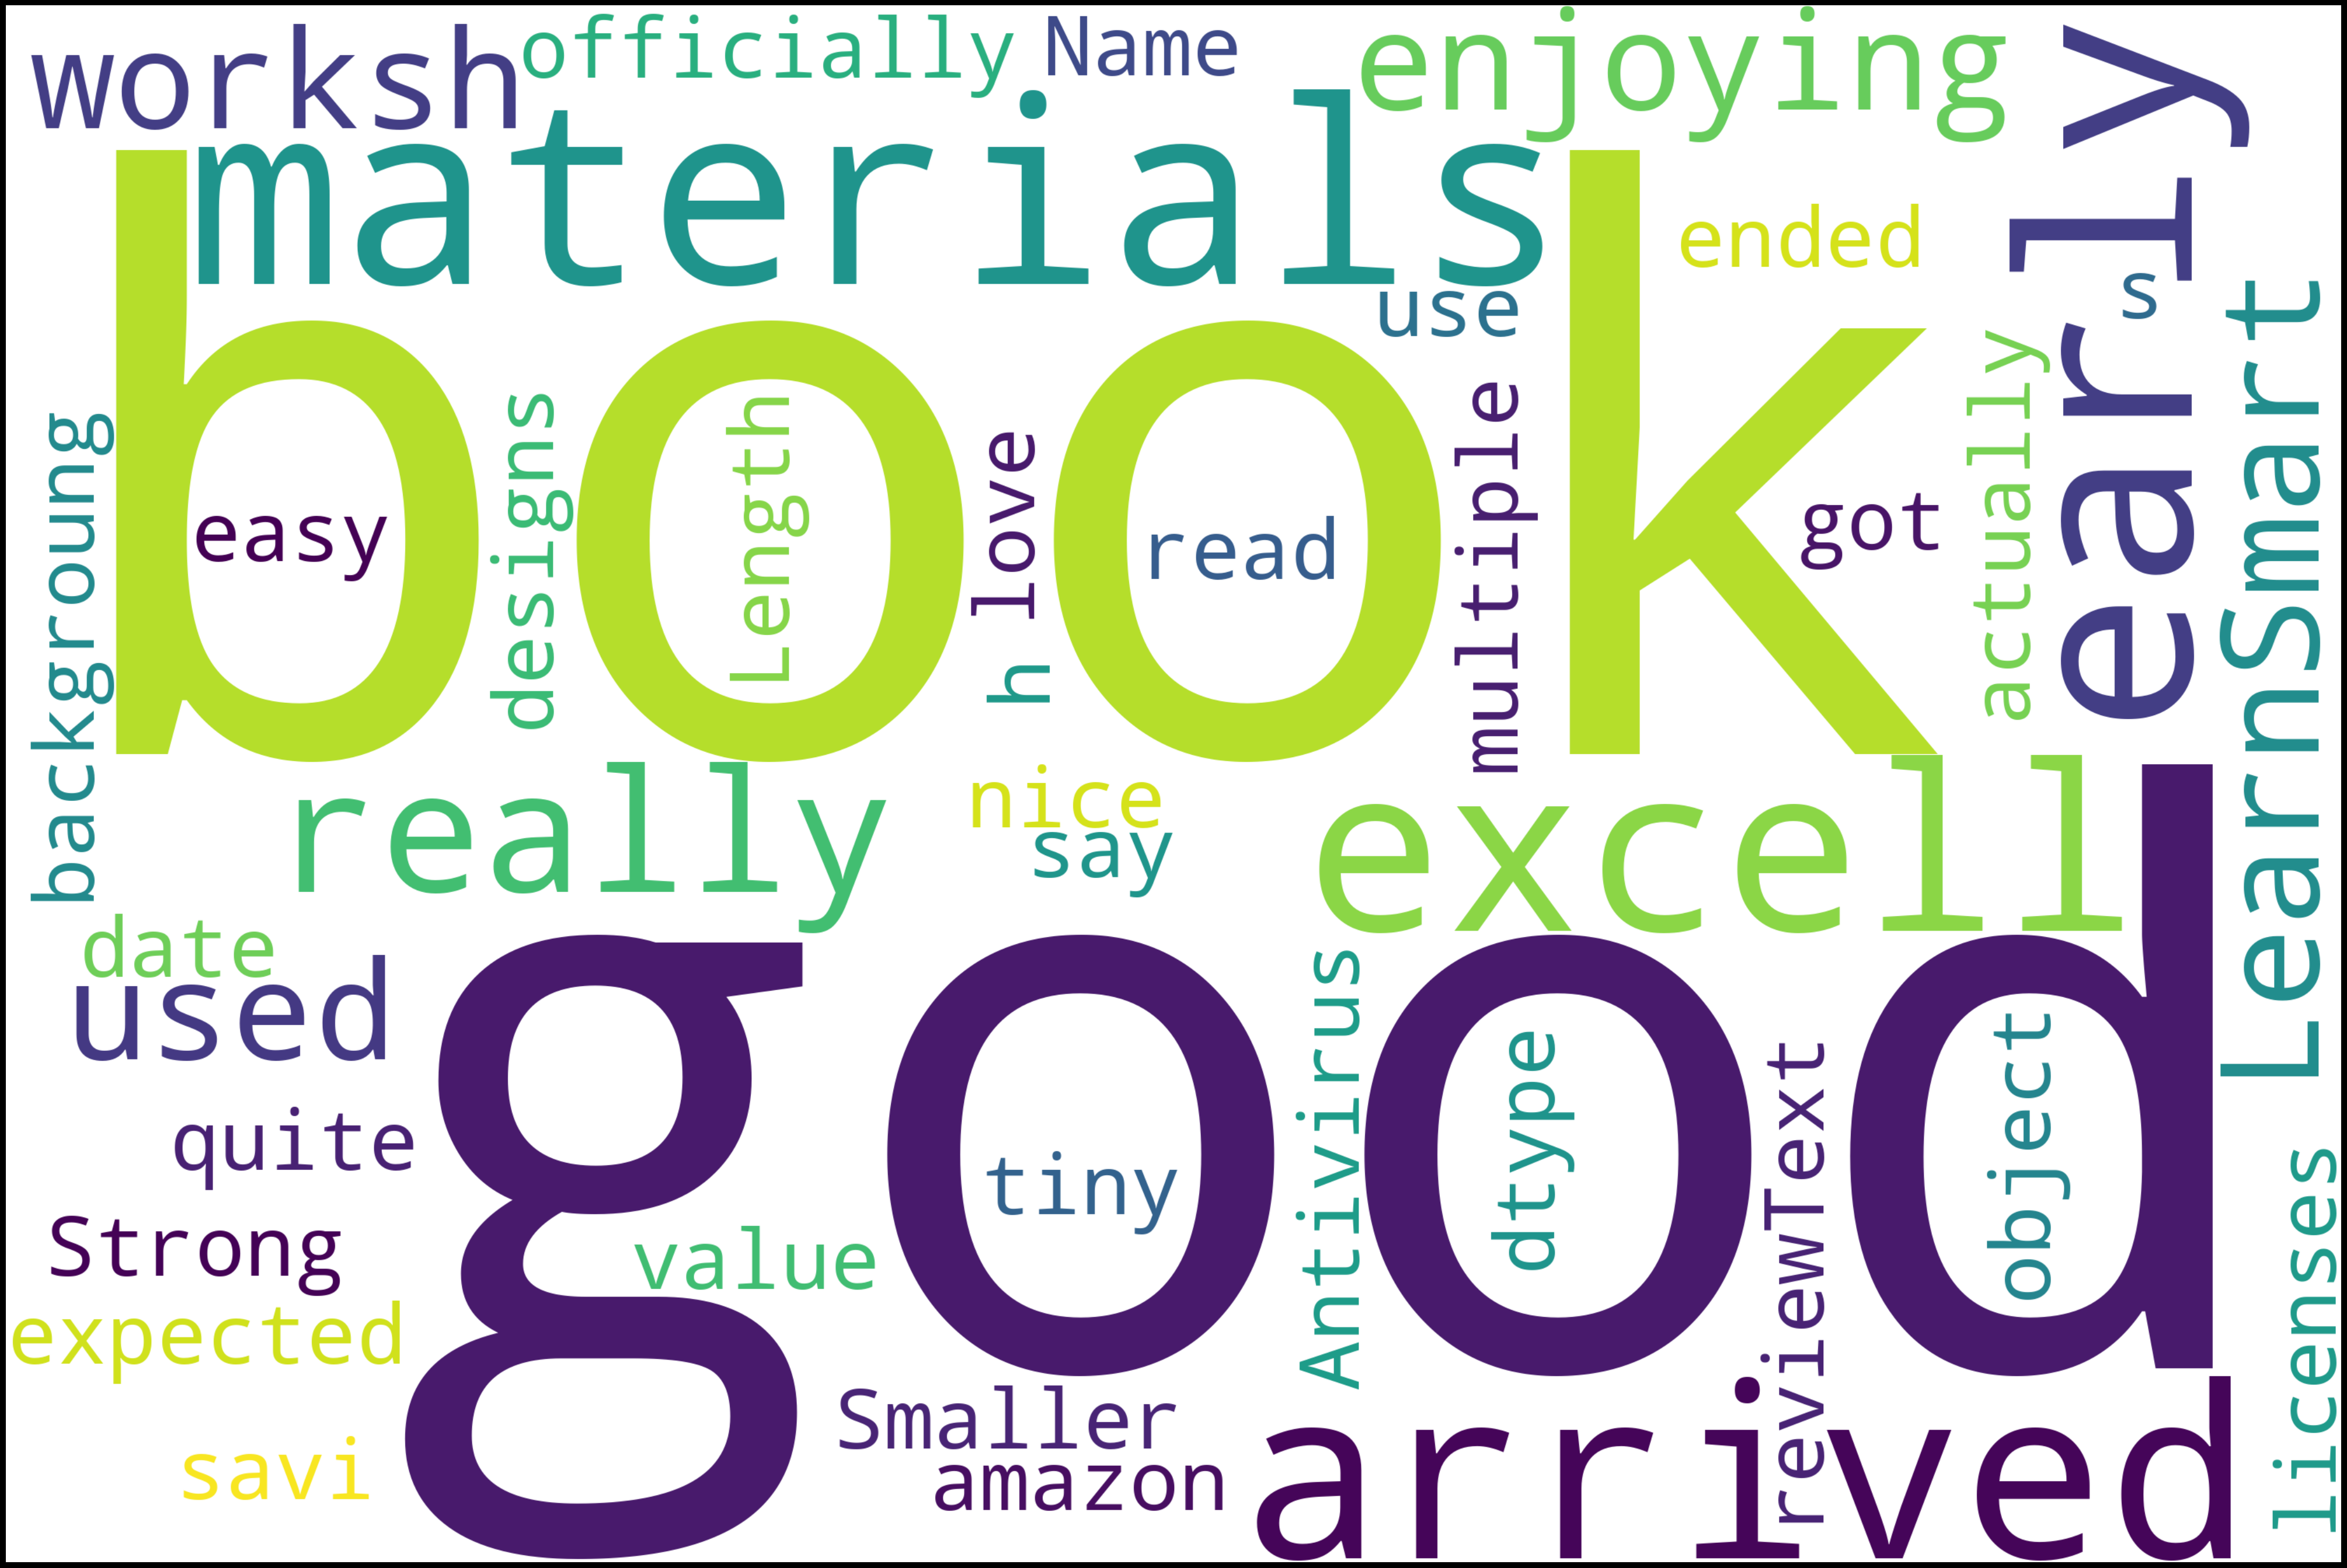

In [47]:
##Wordcloud before
positive = df[df['Sentiment']==1]
negative = df[df['Sentiment']==0]

#build negativr wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm

text = positive.reviewText
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

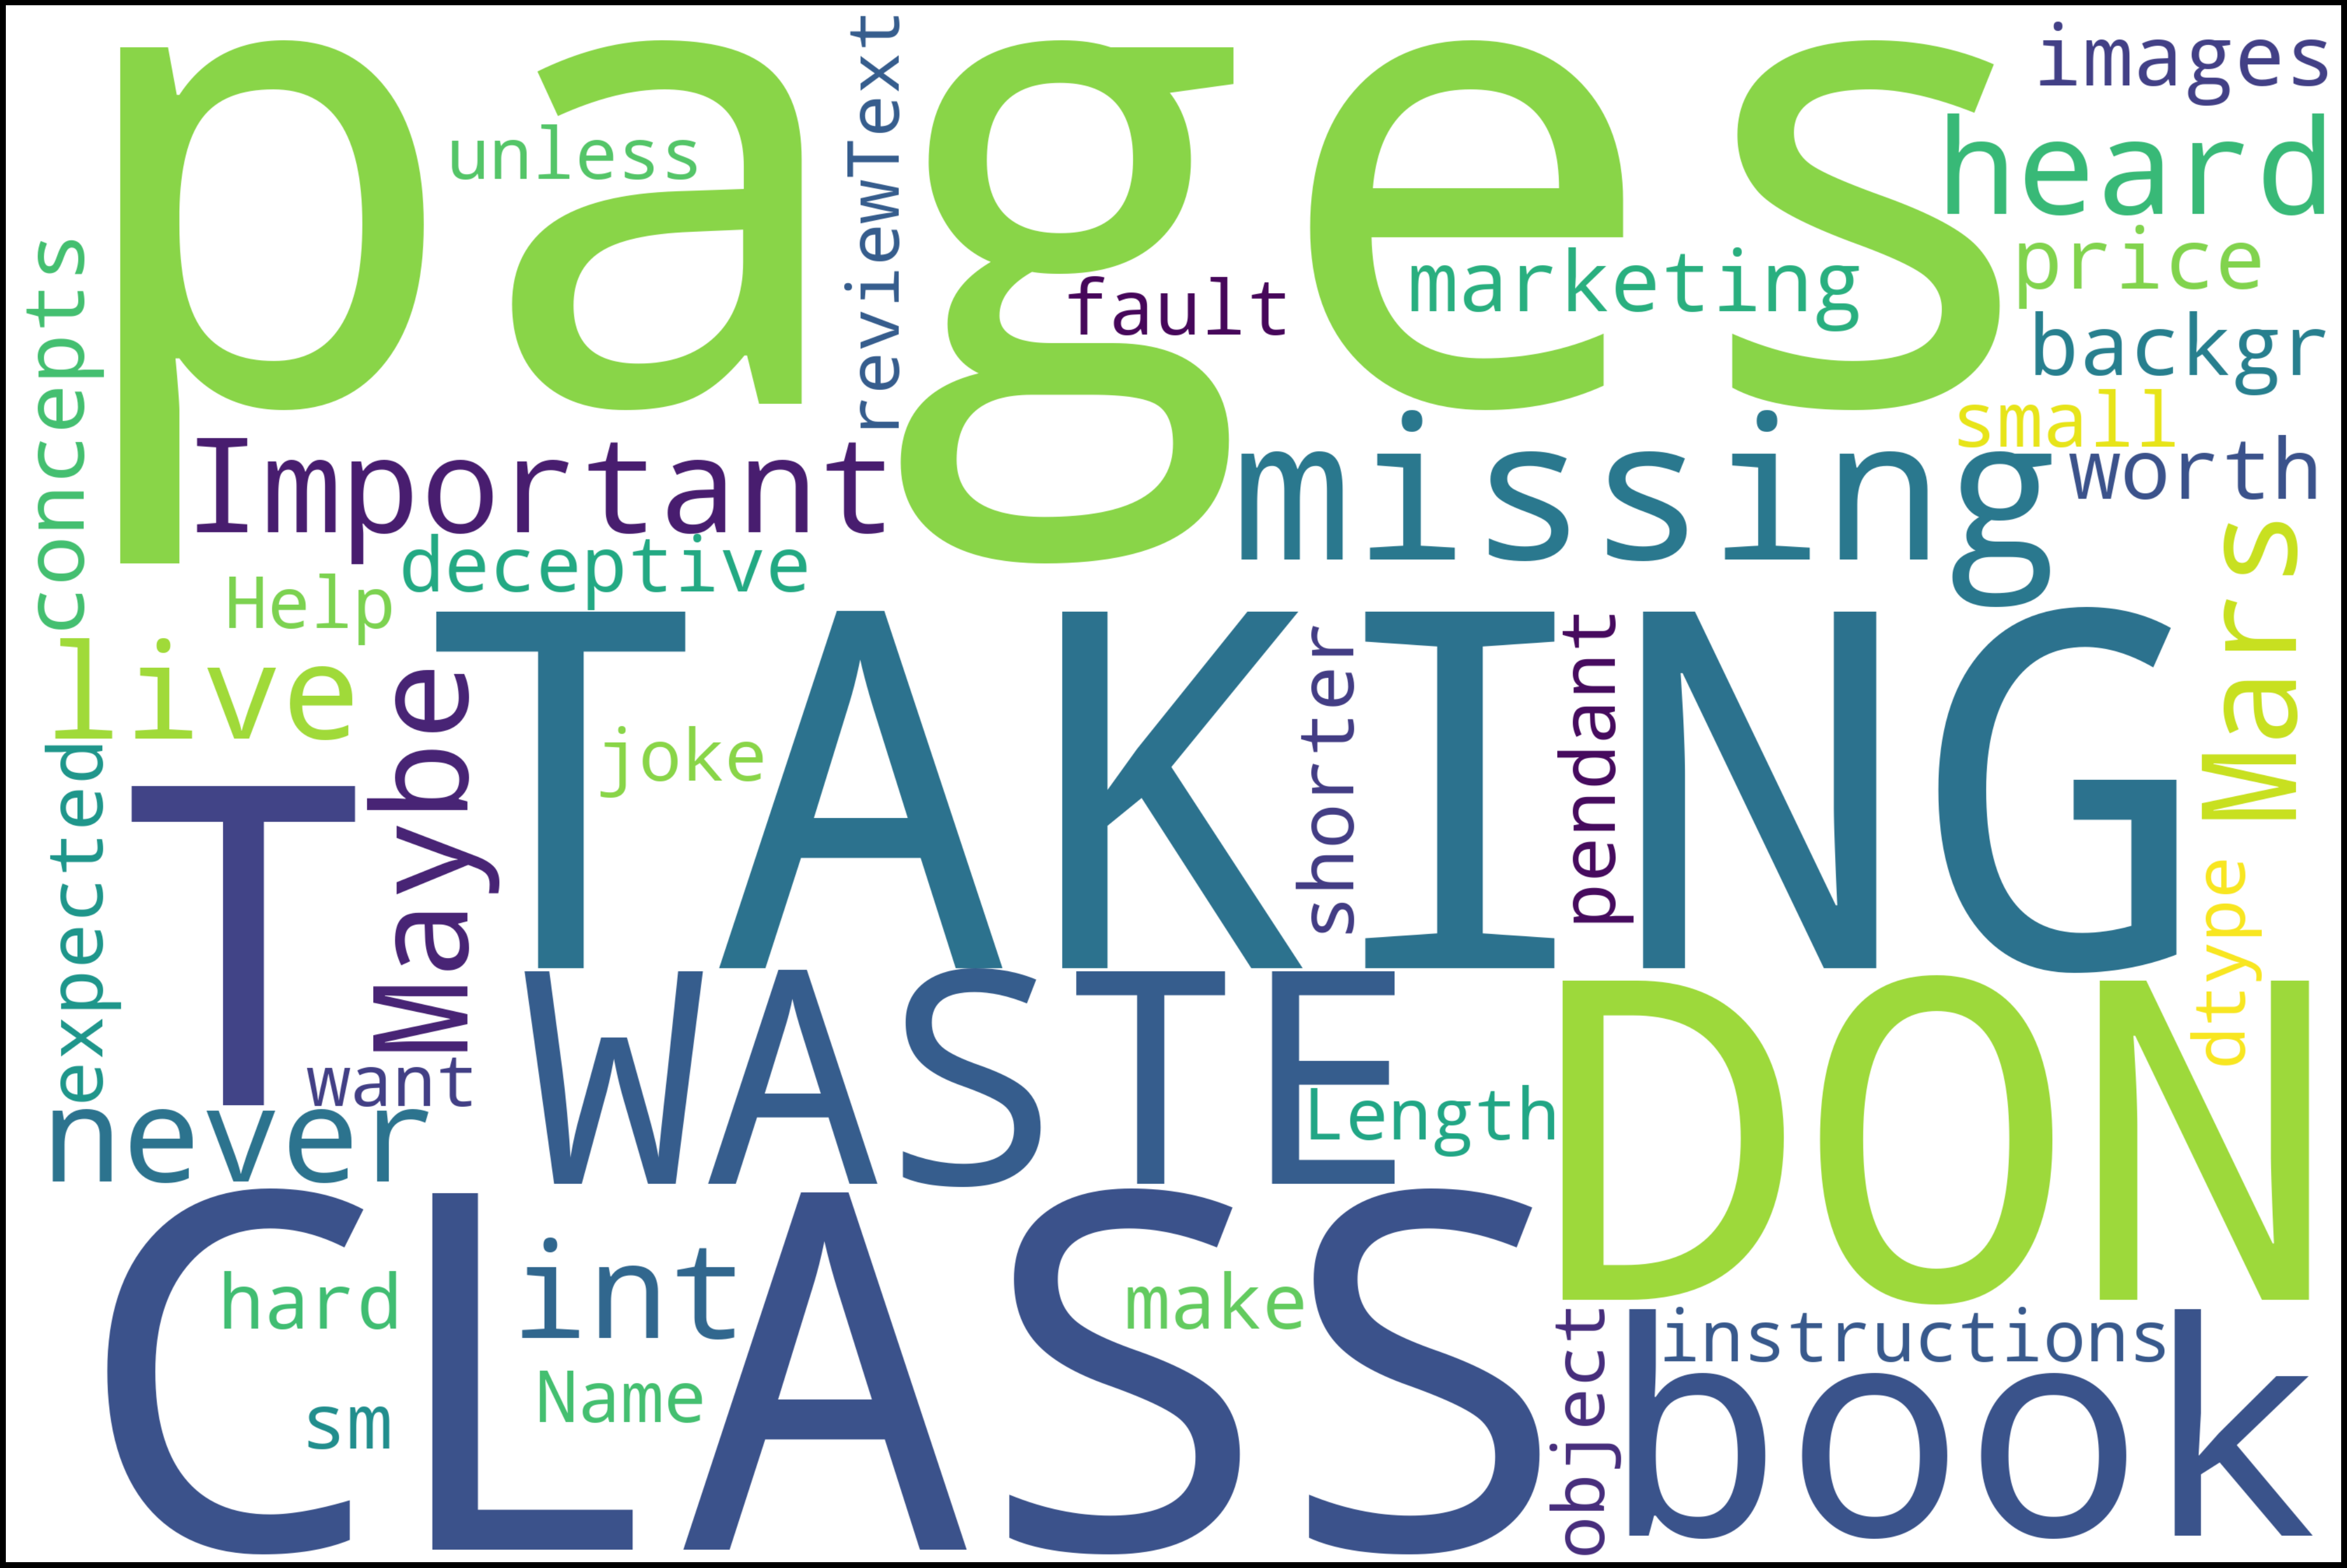

In [46]:
#build negativr wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm

text = negative.reviewText
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [49]:
negative.head()

overall   reviewTime                                         reviewText  \
2       1.0  02 17, 2014  IF YOU ARE TAKING THIS CLASS DON"T WASTE YOUR ...   
3       3.0  02 17, 2014  This book was missing pages!!! Important pages...   
6       3.0   10 9, 2010  If you live on Mars and never heard of the int...   
10      2.0   05 3, 2009  Maybe it's just me (I have no marketing backgr...   
12      2.0  06 23, 2013  Not worth the price. Most of the concepts are ...   

                                    summary year_review  Sentiment  
2                        ARE YOU KIDING ME?        2014          0  
3                           missing pages!!        2014          0  
6   Mars calling Earth....what is internet?        2010          0  
10                 This book is intolerable        2009          0  
12                          Very simplistic        2013          0

In [51]:
from textblob import TextBlob
def lemmatize_with_postag(sentence):
    sent = TextBlob(sentence)
    tag_dict = {"J":'a',"N":'n',"V":'v',"R":'r'}
    words_and_tags = [(w, tag_dict.get(pos[0],'n'))for w, pos in sent.tags]
    lemmatized_list = [wd.lemmatize(tag)for wd, tag in words_and_tags]
    return " ".join(lemmatized_list)

import string
import nltk
from nltk.corpus import stopwords
import re
def normalizer(tweet):
    punct = list(string.punctuation)
    stop_words = stopwords.words('english')
    additional_stop_words = ['RT','rt','via','...','http','twitpic','tinyurl','www', 'amp']
    stopword_list = punct + stop_words + additional_stop_words
    
    tweet = re.sub("#",  " ", tweet)           # Replace pattern # -> ' '
    tweet = re.sub("dont|not|isnt|doesnt|arent|aint", "negation", tweet) #contains negation
    tweet = re.sub("(@[A-Za-z0-9]+)", " ", tweet)
    tweet_ = re.sub("(\w+:\/\/\S+)", " ", tweet)
    tweet__ = re.sub("[^a-zA-Z]", " ", tweet_)
    lemmatized = lemmatize_with_postag(tweet__)
    tokens = nltk.word_tokenize(lemmatized)[2:]
    lower_case = [l.lower() for l in tokens]
    filtered_result = list(filter(lambda l: l not in stopword_list, lower_case))
    return filtered_result

In [52]:
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\T-Gamer\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [60]:
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('wordnet')
2
#remove Null texts
df=df[~df['reviewText'].isnull()]
df['normalized'] = df.reviewText.apply(normalizer)
df['normal'] = [' '.join(map(str, l)) for l in df['normalized']]
df.head(10)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\T-Gamer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\T-Gamer\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\T-Gamer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


overall   reviewTime                                         reviewText  \
0      4.0  03 11, 2014  The materials arrived early and were in excell...   
1      4.0  02 23, 2014  I am really enjoying this book with the worksh...   
2      1.0  02 17, 2014  IF YOU ARE TAKING THIS CLASS DON"T WASTE YOUR ...   
3      3.0  02 17, 2014  This book was missing pages!!! Important pages...   
4      5.0  10 14, 2013  I have used LearnSmart and can officially say ...   
5      4.0  08 15, 2011  Strong backgroung, good read, quite up to date...   
6      3.0   10 9, 2010  If you live on Mars and never heard of the int...   
7      5.0   10 3, 2010  i got this book on amazon and it ended up savi...   
8      5.0   10 3, 2010  I was very happy with this purchase because th...   
9      5.0  05 23, 2010  Recieved in a timely manner- book in great con...   

                                   summary year_review  Sentiment  \
0                           Material Great        2014          1   
1                                   Health        2014          1   
2                       ARE YOU KIDING ME?        2014          0   
3                          missing pages!!        2014          0   
4            Best study product out there!        2013          1   
5                       E-marketing 6th ed        2011          1   
6  Mars calling Earth....what is internet?        2010          0   
7       good book, saved me a lot of money        2010          1   
8                               Super fast        2010          1   
9                              E-Marketing        2010          1   

                                          normalized  \
0  [arrive, early, excellent, condition, however,...   
1  [really, enjoy, book, worksheet, make, review,...   
2  [taking, class, waste, money, called, book, bo...   
3  [miss, page, important, page, answer, test, qu...   
4  [use, learnsmart, officially, say, amazing, st...   
5  [good, read, quite, date, take, holistic, appr...   
6   [live, mars, never, heard, internet, good, book]   
7  [book, amazon, end, save, lot, money, great, c...   
8   [happy, purchase, shipment, super, fast, thanks]   
9  [timely, manner, book, great, condition, marki...   

                                              normal  
0  arrive early excellent condition however money...  
1  really enjoy book worksheet make review goal n...  
2  taking class waste money called book book isin...  
3  miss page important page answer test question ...  
4  use learnsmart officially say amazing study to...  
5  good read quite date take holistic approach su...  
6           live mars never heard internet good book  
7  book amazon end save lot money great condition...  
8          happy purchase shipment super fast thanks  
9  timely manner book great condition marking led...

In [61]:
df.to_pickle("full_dataset_normalized.pkl")

In [2]:
##read dataset
df = pd.read_pickle("full_dataset_normalized.pkl")

In [3]:
##Wordcloud before
positive = df[df['Sentiment']==1]
negative = df[df['Sentiment']==0]

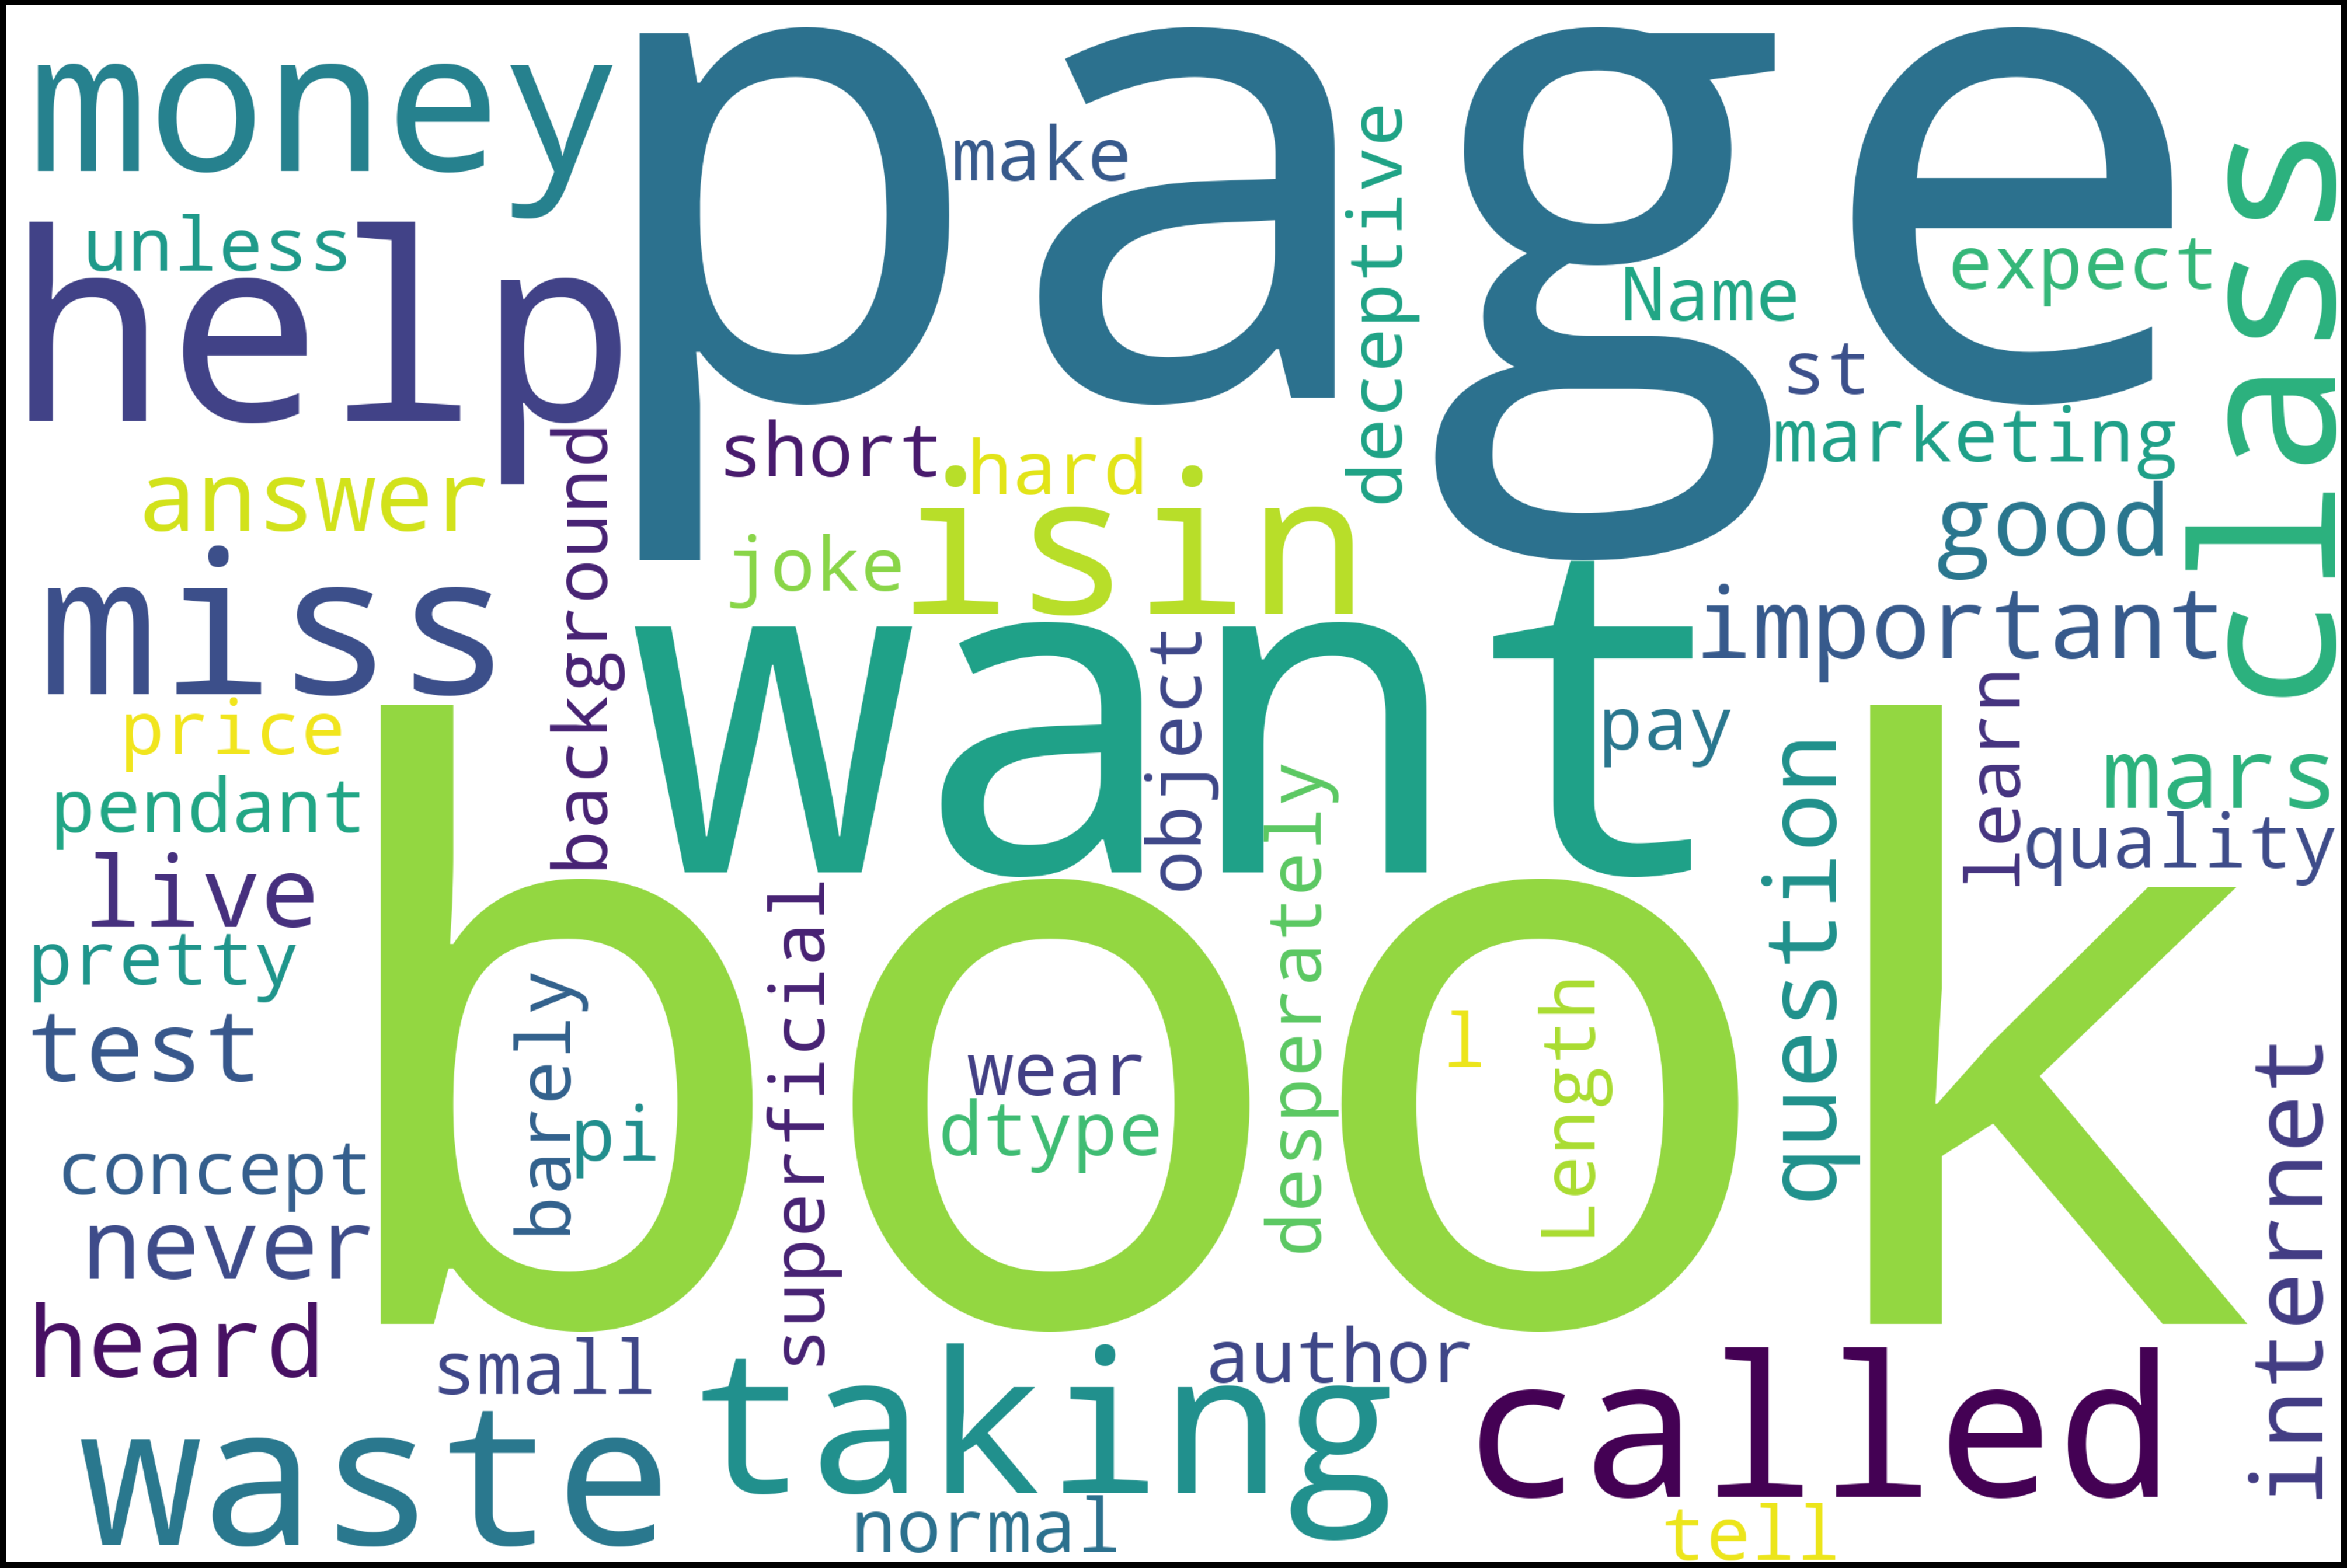

In [4]:
#build negativr wordcloud
text = negative.normal
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

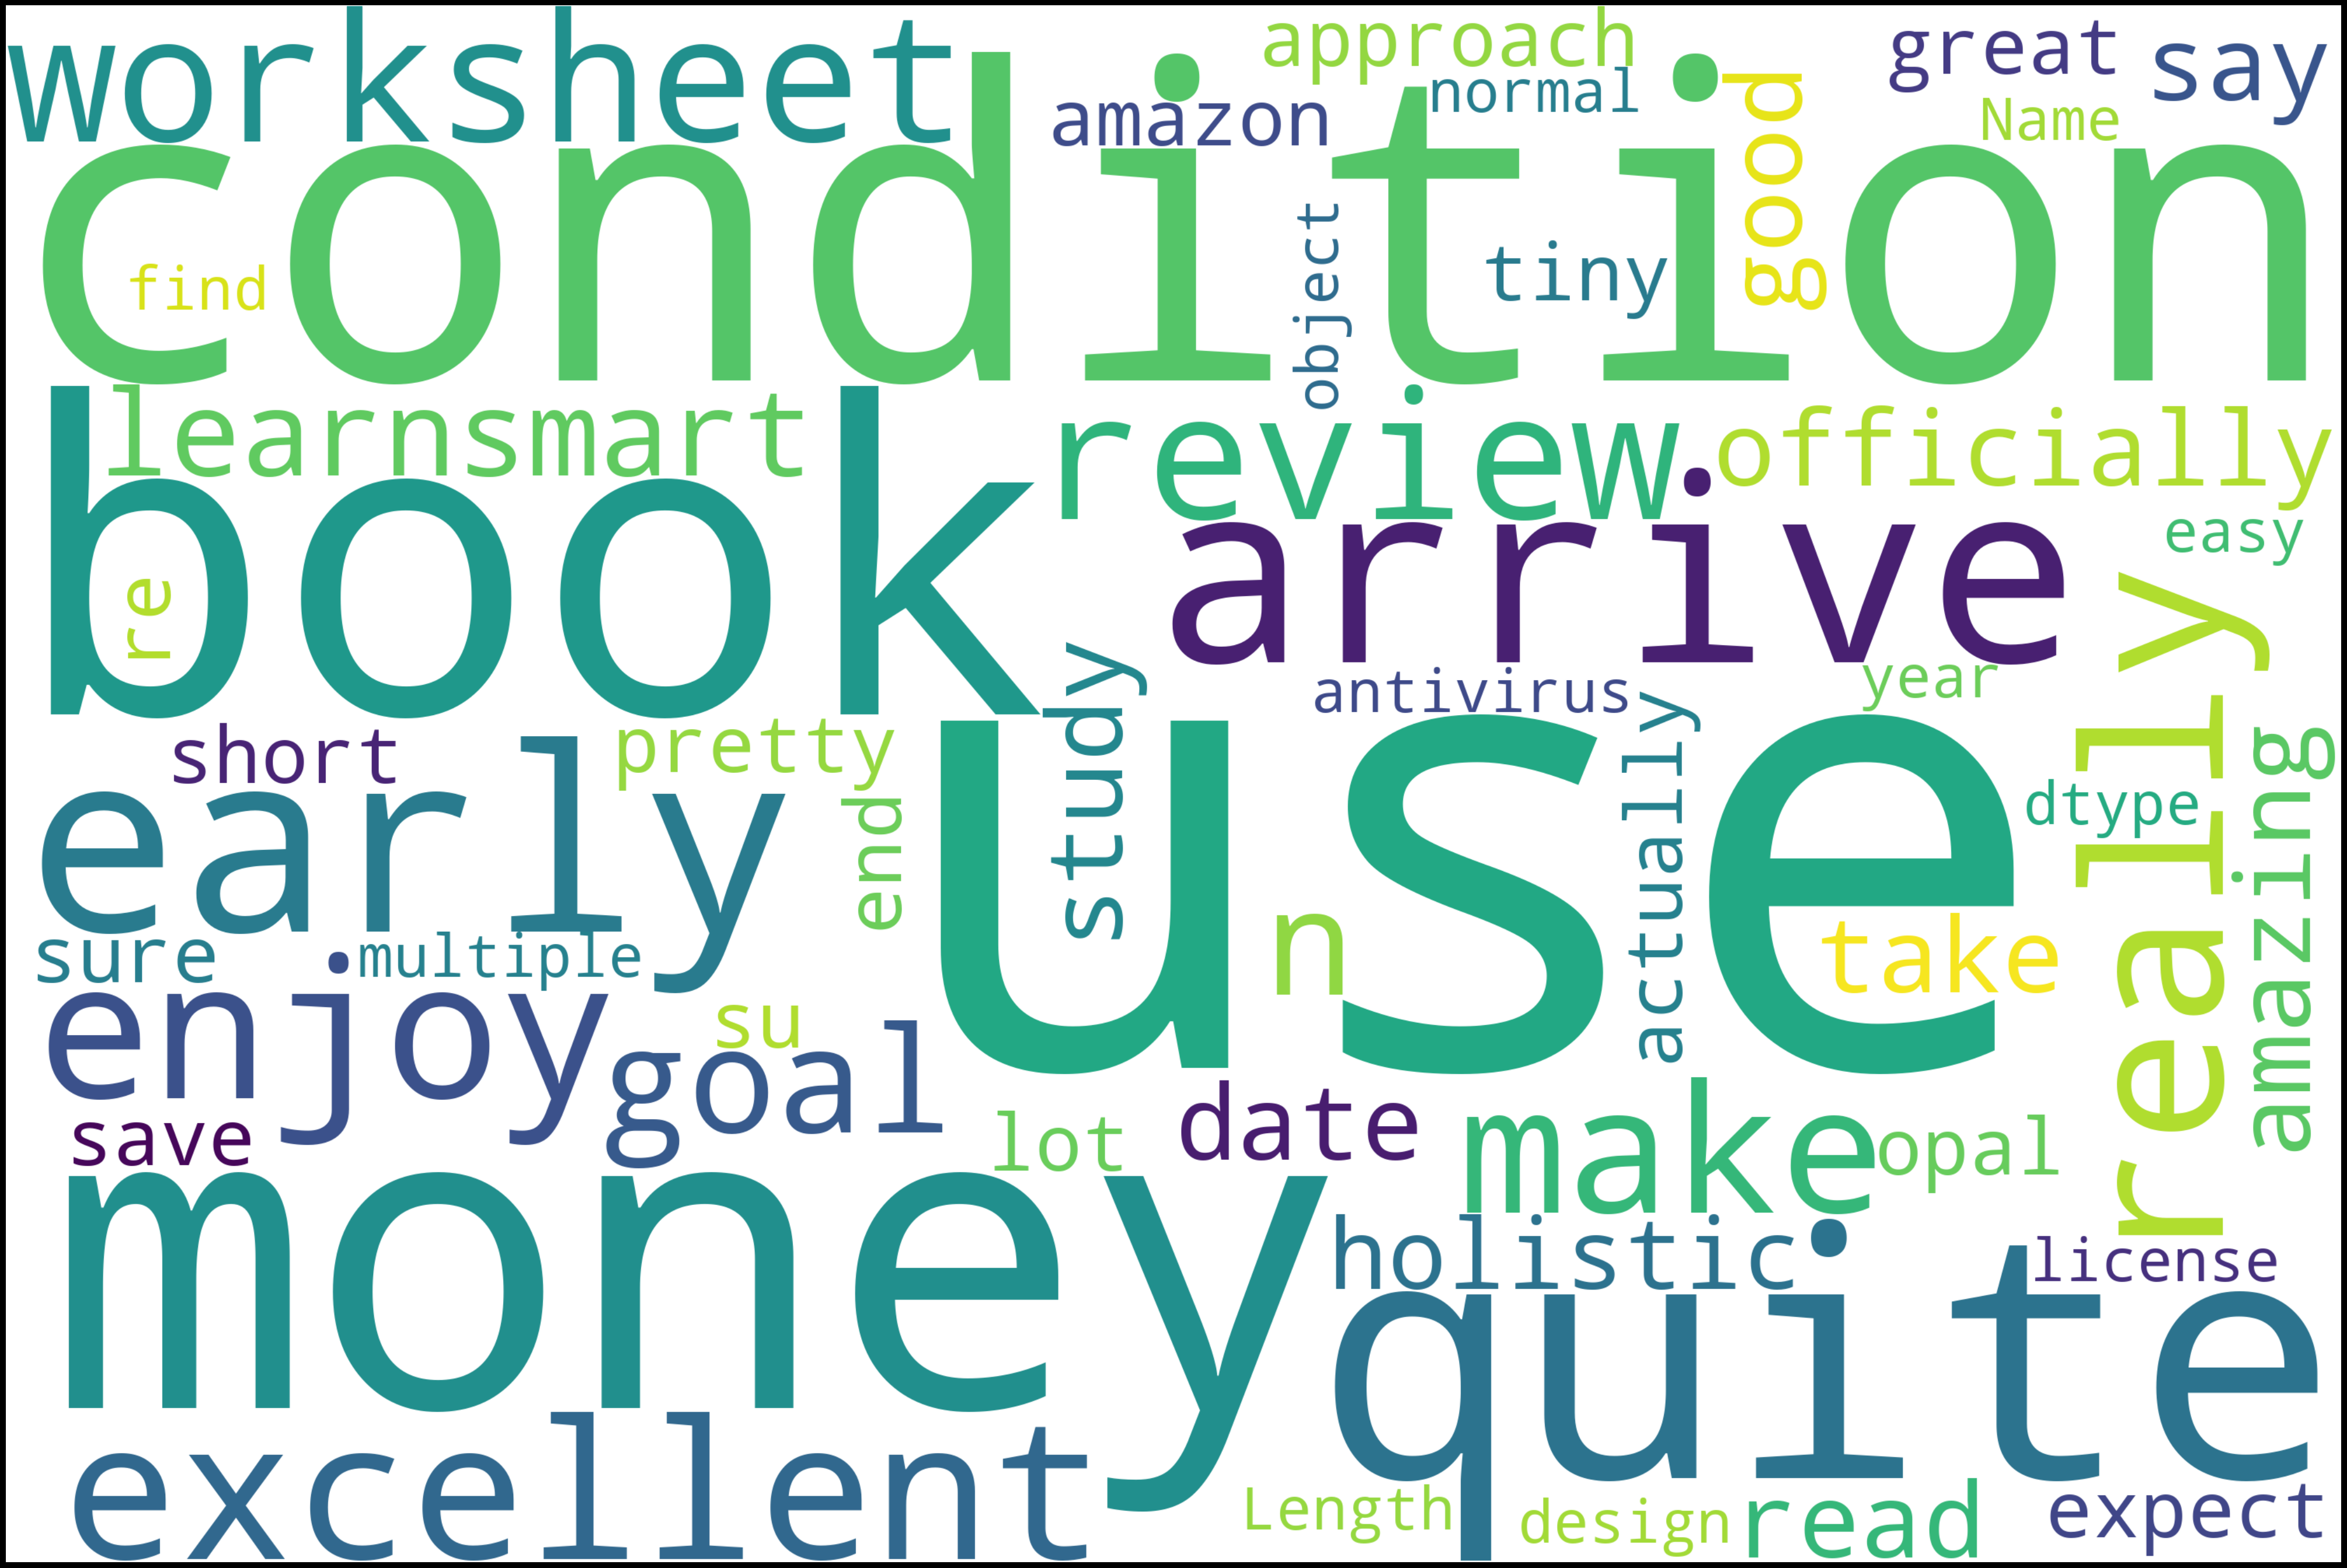

In [5]:
#build positive wordcloud
text = positive.normal
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

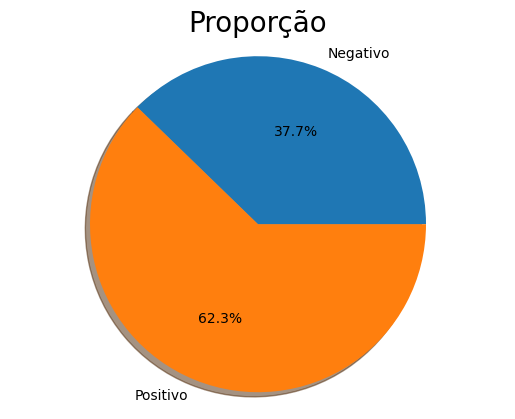

In [6]:
labels = ['Negativo', 'Positivo']
sizes = [df['Sentiment'].value_counts()[0],
         df['Sentiment'].value_counts()[1]
        ]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.title('Proporção', fontsize=20)
plt.show()

In [7]:
### count vectorize then model trainings

from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer  

count_vectorizer = CountVectorizer(ngram_range=(1,2))
vectorized_data =count_vectorizer.fit_transform(df['normal'])

#tfidfconverter = TfidfTransformer()  
#tfid_data = tfidfconverter.fit_transform(vectorized_data)

#indexed_data =hstack((np.array(range(0,tfid_data.shape[0]))[:,None],tfid_data))

#vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
#final_features = vectorizer.fit_transform(train['normal'])

indexed_data =hstack((np.array(range(0,vectorized_data.shape[0]))[:,None],vectorized_data))
#indexed_data =hstack((np.array(range(0,final_features.shape[0]))[:,None],final_features))

vectorized_data.shape
#tfid_data.shape
#final_features.shape

(459370, 3686224)

In [8]:
df.columns

Index(['overall', 'reviewTime', 'reviewText', 'summary', 'year_review',
       'Sentiment', 'normalized', 'normal'],
      dtype='object')

In [9]:
df = df[['overall', 'reviewTime', 'reviewText', 'summary', 'year_review', 'normalized', 'normal', 'Sentiment']]
df.head()

overall   reviewTime                                         reviewText  \
0      4.0  03 11, 2014  The materials arrived early and were in excell...   
1      4.0  02 23, 2014  I am really enjoying this book with the worksh...   
2      1.0  02 17, 2014  IF YOU ARE TAKING THIS CLASS DON"T WASTE YOUR ...   
3      3.0  02 17, 2014  This book was missing pages!!! Important pages...   
4      5.0  10 14, 2013  I have used LearnSmart and can officially say ...   

                         summary year_review  \
0                 Material Great        2014   
1                         Health        2014   
2             ARE YOU KIDING ME?        2014   
3                missing pages!!        2014   
4  Best study product out there!        2013   

                                          normalized  \
0  [arrive, early, excellent, condition, however,...   
1  [really, enjoy, book, worksheet, make, review,...   
2  [taking, class, waste, money, called, book, bo...   
3  [miss, page, important, page, answer, test, qu...   
4  [use, learnsmart, officially, say, amazing, st...   

                                              normal  Sentiment  
0  arrive early excellent condition however money...          1  
1  really enjoy book worksheet make review goal n...          1  
2  taking class waste money called book book isin...          0  
3  miss page important page answer test question ...          0  
4  use learnsmart officially say amazing study to...          1

In [10]:
targets = df.iloc[:, -1]

from sklearn.model_selection import train_test_split 
data_train, data_test, targets_train, targets_test =train_test_split(indexed_data, targets, test_size=0.25,random_state=100)
data_train_index = data_train[:,0]
data_train = data_train[:,1:]
data_test_index = data_test[:,0]
data_test = data_test[:,1:]

In [11]:
indexed_data

<459370x3686225 sparse matrix of type '<class 'numpy.int64'>'
	with 30481465 stored elements in COOrdinate format>

In [12]:
targets_train.value_counts(normalize=True)

Sentiment
1    0.6229
0    0.3771
Name: proportion, dtype: float64

In [16]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline

In [14]:
# Define a list of classifiers
classifiers = [
    {
        'name': 'MultinomialNB',
        'classifier': MultinomialNB()
    },
    {
        'name': 'SVM',
        'classifier': LinearSVC(C=0.1)
    },
    {
        'name': 'RandomForest',
        'classifier': RandomForestClassifier(max_depth=10, n_estimators=50)
    },
    {
        'name': 'KNeighbors',
        'classifier': KNeighborsClassifier()
    }
]

# Iterate over classifiers
for clf in classifiers:
    name = clf['name']
    classifier = clf['classifier']

    # Create a pipeline without vectorization step
    pipeline = Pipeline([
        ('classifier', classifier)
    ])

    print(f"\nTesting {name}:")

    # Train the classifier on the training set
    pipeline.fit(data_train, targets_train)

    # Test the classifier on the test set
    predictions = pipeline.predict(data_test)

    # Evaluate the performance
    accuracy = accuracy_score(targets_test, predictions)
    print("Accuracy:", accuracy)
    
    print("Classification Report:")
    print(classification_report(targets_test, predictions))


Testing MultinomialNB:
Accuracy: 0.8426199245927048
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79     43460
           1       0.86      0.89      0.88     71383

    accuracy                           0.84    114843
   macro avg       0.83      0.83      0.83    114843
weighted avg       0.84      0.84      0.84    114843


Testing SVM:


C:\Users\T-Gamer\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\T-Gamer\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy: 0.8570657332183939
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.75      0.80     43460
           1       0.86      0.92      0.89     71383

    accuracy                           0.86    114843
   macro avg       0.86      0.84      0.84    114843
weighted avg       0.86      0.86      0.85    114843


Testing RandomForest:
Accuracy: 0.6222233832275367
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.00      0.00     43460
           1       0.62      1.00      0.77     71383

    accuracy                           0.62    114843
   macro avg       0.75      0.50      0.39    114843
weighted avg       0.72      0.62      0.48    114843


Testing KNeighbors:
Accuracy: 0.7185723117647571
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.42      0.53     43460
           1       0.72      0.90    

In [17]:
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Define a list of classifiers
classifiers = [
    {
        'name': 'LogisticRegression',
        'classifier': LogisticRegression(max_iter=1000)
    },
    {
        'name': 'MultinomialNB',
        'classifier': MultinomialNB()
    },
    {
        'name': 'SVM',
        'classifier': LinearSVC(C=0.1)
    }
]

# Iterate over classifiers
for clf in classifiers:
    name = clf['name']
    classifier = clf['classifier']

    # Create a pipeline without vectorization step
    pipeline = Pipeline([
        ('classifier', classifier)
    ])

    print(f"\nTesting {name}:")

    # Perform cross-validation and print the results
    cv_results = cross_val_score(pipeline, indexed_data, targets, cv=kf, scoring='accuracy')
    print("Cross-Validated Accuracy:", cv_results.mean())
    print("Cross-Validated Precision, Recall, and F1-score:")
    print(cross_val_score(pipeline, indexed_data, targets, cv=kf, scoring='precision_macro').mean())
    print(cross_val_score(pipeline, indexed_data, targets, cv=kf, scoring='recall_macro').mean())
    print(cross_val_score(pipeline, indexed_data, targets, cv=kf, scoring='f1_macro').mean())


Testing LogisticRegression:
Cross-Validated Accuracy: 0.6225656877862219
Cross-Validated Precision, Recall, and F1-score:


C:\Users\T-Gamer\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\T-Gamer\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.31128352152801003
0.4999982516871219
0.3836921318329604

Testing MultinomialNB:
Cross-Validated Accuracy: 0.6984892326761855
Cross-Validated Precision, Recall, and F1-score:
0.6793150414959662
0.6536734529934457
0.6582719395547384

Testing SVM:


C:\Users\T-Gamer\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\T-Gamer\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\T-Gamer\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\T-Gamer\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\T-Gamer\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will ch

Cross-Validated Accuracy: 0.5762455931290931
Cross-Validated Precision, Recall, and F1-score:


C:\Users\T-Gamer\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\T-Gamer\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\T-Gamer\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\T-Gamer\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\T-Gamer\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will ch

0.6796567940547465


C:\Users\T-Gamer\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\T-Gamer\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\T-Gamer\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\T-Gamer\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\T-Gamer\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will ch

0.5759687986714324


C:\Users\T-Gamer\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\T-Gamer\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\T-Gamer\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\T-Gamer\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\T-Gamer\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will ch

0.5099654413775774


C:\Users\T-Gamer\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
##Choosing SVC and Naive Bayes for hyperparmeter tuning

from sklearn.model_selection import GridSearchCV, StratifiedKFold

param_grid_linear_svc = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

linear_svc_classifier = LinearSVC()

grid_search_linear_svc = GridSearchCV(linear_svc_classifier, param_grid_linear_svc, cv=3, scoring='f1_macro')
grid_search_linear_svc.fit(data_train, targets_train)

In [22]:
warnings.filterwarnings("ignore")

best_params_linear_svc = grid_search_linear_svc.best_params_
best_model_linear_svc = grid_search_linear_svc.best_estimator_

print(f"Best parameters for Linear SVC: {best_params_linear_svc}")
print(F"Best model: {best_model_linear_svc}")

Best parameters for Linear SVC: {'C': 0.1, 'penalty': 'l2'}
Best model: LinearSVC(C=0.1)


In [25]:
#Naive Bayes
param_grid_nb = {
    'alpha': [0.1, 1, 10]
}

nb_classifier = MultinomialNB()

grid_search_nb = GridSearchCV(nb_classifier, param_grid_nb, cv=3, scoring='f1_macro')
grid_search_nb.fit(data_train, targets_train)

best_params_nb = grid_search_nb.best_params_
best_model_nb = grid_search_nb.best_estimator_

print(f"Best parameters for NB: {best_params_nb}")
print(F"Best model: {best_model_nb}")

Best parameters for NB: {'alpha': 1}
Best model: MultinomialNB(alpha=1)


In [26]:
#Compare both models
from sklearn.metrics import classification_report, confusion_matrix

linear_svc_classifier = LinearSVC(C=best_params_linear_svc['C'], penalty=best_params_linear_svc['penalty'])

linear_svc_classifier.fit(data_train, targets_train)

# Make predictions on the test set
predictions_linear_svc = linear_svc_classifier.predict(data_test)

# Evaluate the performance with a classification report and confusion matrix
print("LinearSVC Classification Report:")
print(classification_report(targets_test, predictions_linear_svc))
print("\nLinearSVC Confusion Matrix:")
print(confusion_matrix(targets_test, predictions_linear_svc))

LinearSVC Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.75      0.80     43460
           1       0.86      0.92      0.89     71383

    accuracy                           0.86    114843
   macro avg       0.86      0.84      0.84    114843
weighted avg       0.86      0.86      0.85    114843


LinearSVC Confusion Matrix:
[[32522 10938]
 [ 5477 65906]]


In [27]:
nb_classifier = MultinomialNB(alpha=best_params_nb['alpha'])

# Train the Naive Bayes model on the entire training set
nb_classifier.fit(data_train, targets_train)

# Make predictions on the test set
predictions_nb = nb_classifier.predict(data_test)

# Evaluate the performance with a classification report and confusion matrix
print("Naive Bayes Classification Report:")
print(classification_report(targets_test, predictions_nb))
print("\nNaive Bayes Confusion Matrix:")
print(confusion_matrix(targets_test, predictions_nb))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79     43460
           1       0.86      0.89      0.88     71383

    accuracy                           0.84    114843
   macro avg       0.83      0.83      0.83    114843
weighted avg       0.84      0.84      0.84    114843


Naive Bayes Confusion Matrix:
[[33382 10078]
 [ 7996 63387]]


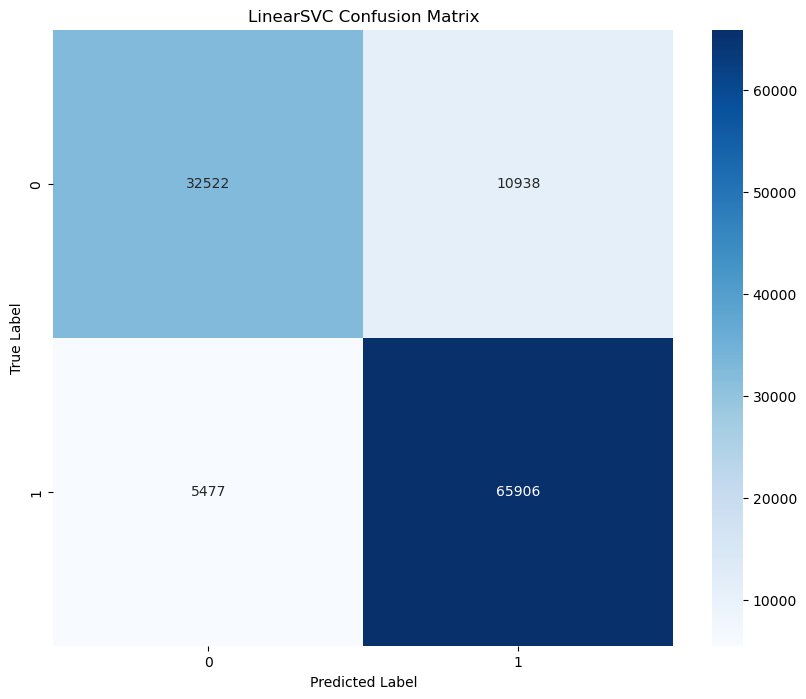

In [34]:
#Linear SVC it is
# Display the confusion matrix using seaborn heatmap

# Get the confusion matrix
cm_svc = confusion_matrix(targets_test, predictions_linear_svc)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues')
plt.title('LinearSVC Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()